<a href= "Universal%20Approximation%20Theorem.ipynb" target = "_blank">
    <h3>Universal approximation theorem</h3>
</a>

# MLP

In [37]:
from pyNNRW.MLP import *

In [38]:
%run "../../machine learning/source/18. pyNNRW/github/src/pyNNRW/MLP.py"

<Figure size 432x288 with 0 Axes>

Load data and create nn

In [39]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, t_train), (x_test, t_test) = mnist.load_data()
n_classes = len(set(t_train))
x_train = x_train.astype(np.float32) / 255.
x_train = x_train.reshape(-1, 28**2)
x_test = x_test.astype(np.float32) / 255.
x_test = x_test.reshape(-1, 28**2)
t_train = to_categorical(t_train, n_classes).astype(np.float32)
t_test = to_categorical(t_test, n_classes).astype(np.float32)

network = MLP(input_size=784, hidden_size=50, output_size=10)

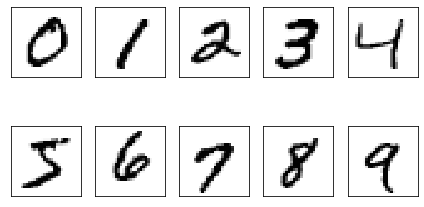

In [40]:
import matplotlib.pyplot as plt

# Visualize the first digit of each class
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True) 
ax = ax.flatten()
for i in range(10):
    img = x_train[t_train.argmax(axis=1) == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

Gradient Check

In [41]:
x_batch = x_train[:5]
t_batch = t_train[:5]

network.gradient_check(x_batch, t_batch)

W1:1.558562703577807e-10
b1:0.0005530109159076134
W2:4.9652577881739714e-08
b2:0.07943836526202312


train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.8001666666666667, 0.8053
train acc, test acc | 0.8741666666666666, 0.8788
train acc, test acc | 0.8977666666666667, 0.9012
train acc, test acc | 0.90825, 0.9099
train acc, test acc | 0.9151166666666667, 0.9162
train acc, test acc | 0.9198666666666667, 0.9218
train acc, test acc | 0.9238333333333333, 0.9255
train acc, test acc | 0.9285166666666667, 0.9299
train acc, test acc | 0.9316833333333333, 0.9329
train acc, test acc | 0.9343666666666667, 0.9348
train acc, test acc | 0.9368833333333333, 0.9371
train acc, test acc | 0.9394166666666667, 0.9393
train acc, test acc | 0.94075, 0.9403
train acc, test acc | 0.94345, 0.9423
train acc, test acc | 0.9448333333333333, 0.943
train acc, test acc | 0.94705, 0.9469
train acc, test acc | 0.9486833333333333, 0.9469
train acc, test acc | 0.9500333333333333, 0.9479
train acc, test acc | 0.9515666666666667, 0.9497
train acc, test acc | 0.9527166666666667, 0.9507
train acc, test

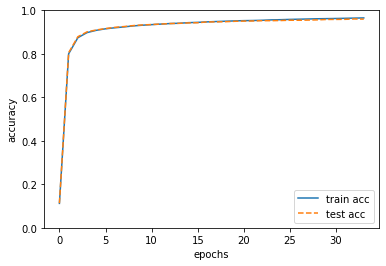

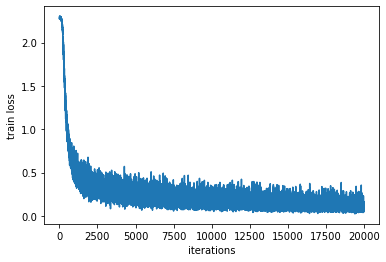

In [42]:
train_loss_list, train_acc_list, test_acc_list = network.train(x_train, t_train, x_test, t_test, iters = 20000)